In [1]:
from helpers import * 
from processor import *

from rel import * 

ic| cut_vertices: [7, 0]
ic| tri.target_edge: (0, 3)
ic| 'same y', n1_y: -0.3620689655172414, n2_y: -0.3620689655172414
ic| len(l3_cycles): 8, m: 16, n: 9, m - n + 1: 8
ic| directions: {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.05747126436781608, 0.23563218390804597),
                 'south': (-0.5862068965517242, -0.3620689655172414),
                 'west': (-0.5862068965517242, -0.3620689655172414)}
ic| directions: {'east': (0.2873563218390804, -0.27011494252873564),
                 'north': (0.05747126436781608, 0.23563218390804597),
                 'south': (-0.5862068965517242, -0.3620689655172414),
                 'west': (-0.5402298850574713, 0.09770114942528735)}
ic| 'Passes planarity check'


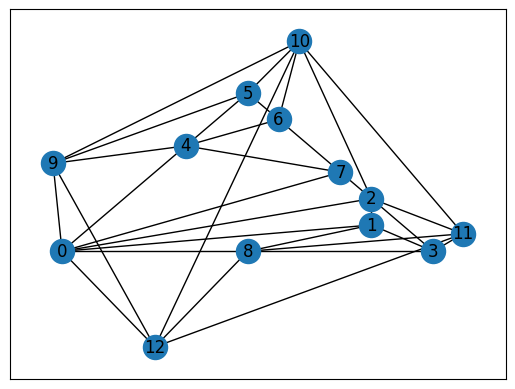

In [2]:
G_st = st_graph(seed=1) #  doesnt help when refresh.. 
p = Processor(G_st)
p.run()
pos = plot_planar(p.G, p.embed)

In [3]:
p.GraphData

GraphData{'G': <networkx.classes.graph.Graph object at 0x1341152b0>, 'embed': {0: array([-1.        , -0.36206897]), 1: array([ 0.37931034, -0.22413793]), 2: array([ 0.37931034, -0.0862069 ]), 3: array([ 0.65517241, -0.36206897]), 4: array([-0.44827586,  0.18965517]), 5: array([-0.17241379,  0.46551724]), 6: array([-0.03448276,  0.32758621]), 7: array([0.24137931, 0.05172414]), 8: array([-0.17241379, -0.36206897]), 9: array([-1.04022989,  0.09770115]), 10: array([0.05747126, 0.73563218]), 11: array([ 0.78735632, -0.27011494]), 12: array([-0.5862069 , -0.86206897])}, 'corner_node_data': {0: CornerNode({'neighbour_indices': [0, 4, 5], 'name': 'west', 'index': 9, 'location': (-1.0402298850574714, 0.09770114942528735), 'mean_location': (-0.5402298850574713, 0.09770114942528735)}), 1: CornerNode({'neighbour_indices': [5, 6, 2], 'name': 'north', 'index': 10, 'location': (0.05747126436781608, 0.735632183908046), 'mean_location': (0.05747126436781608, 0.23563218390804597)}), 2: CornerNode({'ne

In [4]:
p.GraphData.corner_node_data

{0: CornerNode({'neighbour_indices': [0, 4, 5], 'name': 'west', 'index': 9, 'location': (-1.0402298850574714, 0.09770114942528735), 'mean_location': (-0.5402298850574713, 0.09770114942528735)}),
 1: CornerNode({'neighbour_indices': [5, 6, 2], 'name': 'north', 'index': 10, 'location': (0.05747126436781608, 0.735632183908046), 'mean_location': (0.05747126436781608, 0.23563218390804597)}),
 2: CornerNode({'neighbour_indices': [2, 3, 8], 'name': 'east', 'index': 11, 'location': (0.7873563218390804, -0.27011494252873564), 'mean_location': (0.2873563218390804, -0.27011494252873564)}),
 3: CornerNode({'neighbour_indices': [8, 0], 'name': 'south', 'index': 12, 'location': (-0.5862068965517242, -0.8620689655172413), 'mean_location': (-0.5862068965517242, -0.3620689655172414)})}

In [5]:
p.GraphData.G.nodes.data()

NodeDataView({0: {'corner_or_interior': 'interior', 'canonical_order': 7}, 1: {'corner_or_interior': 'interior', 'canonical_order': 9}, 2: {'corner_or_interior': 'interior', 'canonical_order': 8}, 3: {'corner_or_interior': 'interior', 'canonical_order': 10}, 4: {'corner_or_interior': 'interior', 'canonical_order': 5}, 5: {'corner_or_interior': 'interior', 'canonical_order': 3}, 6: {'corner_or_interior': 'interior', 'canonical_order': 4}, 7: {'corner_or_interior': 'interior', 'canonical_order': 6}, 8: {'corner_or_interior': 'interior', 'canonical_order': 11}, 9: {'corner_or_interior': 'corner', 'canonical_order': 2}, 10: {'corner_or_interior': 'corner', 'canonical_order': 2}, 11: {'corner_or_interior': 'corner', 'canonical_order': 12}, 12: {'corner_or_interior': 'corner', 'canonical_order': 1}})

In [6]:
def get_unique_edges(old, new):
    edge_status = {}

    for n in new:
        edge_status[n] = False
        for o in old:
            same = set(n) == set(o)
            if same:
                edge_status[n] = True

    current_unique  = []
    for k,v in edge_status.items():
        if v == False:
            current_unique.append(k)
    
    all_unique = current_unique.copy()
    all_unique.extend(old)

    return current_unique, all_unique

In [7]:
vars(GraphData)

mappingproxy({'__module__': 'helpers_classes',
              '__init__': <function helpers_classes.GraphData.__init__(self, G: networkx.classes.graph.Graph, embed: dict, corner_node_data: dict = None) -> None>,
              '__repr__': <function helpers_classes.GraphData.__repr__(self)>,
              '__dict__': <attribute '__dict__' of 'GraphData' objects>,
              '__weakref__': <attribute '__weakref__' of 'GraphData' objects>,
              '__doc__': None})

In [8]:
def filter_corner_connections(original, GraphData:GraphData):
    corner_indices = [ix.index for ix in GraphData.corner_node_data.values()]
    filtered  = []

    for e in original:
        conencting_corner_nodes = e[0] in corner_indices and e[1] in corner_indices
        if not conencting_corner_nodes:
            filtered.append(e)
    return filtered

def get_node_edges(GraphData:GraphData, node_to_find):
    # Find edges connected to the specified node
    original =  [(u, v) for u, v in GraphData.G.edges() if u == node_to_find or v == node_to_find]
    filtered = filter_corner_connections(original, GraphData)

    return filtered

def rearrange_edges(edges, node, DIR="out"):
   if DIR=="in":
        return [(v, u) if u == node else (u, v) for u, v in edges]
   elif DIR=="out":
       return [(v,u) if v == node else (u,v) for u, v in edges]

In [9]:
def process_edges(node:CornerNode, edges):
    if node.name in ["south", "west"]:
        DIR = "out"
    elif node.name in ["east", "north"]:
        DIR = "in"
    else:
        raise ValueError("Invalid direction name")

    correct_edges = rearrange_edges(edges, node.index, DIR)
    ic((node.index, node.name, correct_edges, DIR, "\n"))  
    return correct_edges

In [12]:
# find eges of each corner node 
G = p.GraphData.G
all_correct = []

for node in p.GraphData.corner_node_data.values():
    current = get_node_edges(p.GraphData, node.index)
    
    correct = process_edges(node, current)
    
    all_correct.extend(correct)
    ic(all_correct)


DG = nx.DiGraph()
DG.add_edges_from(all_correct)

ic| (node.index, node.name, correct_edges, DIR, "\n"): (9, 'west', [(9, 0), (9, 4), (9, 5)], 'out', '
                                                       ')
ic| all_correct: [(9, 0), (9, 4), (9, 5)]
ic| (node.index, node.name, correct_edges, DIR, "\n"): (10, 'north', [(2, 10), (5, 10), (6, 10)], 'in', '
                                                       ')
ic| all_correct: [(9, 0), (9, 4), (9, 5), (2, 10), (5, 10), (6, 10)]
ic| (node.index, node.name, correct_edges, DIR, "\n"): (11, 'east', [(2, 11), (3, 11), (8, 11)], 'in', '
                                                       ')
ic| all_correct: [(9, 0), (9, 4), (9, 5), (2, 10), (5, 10), (6, 10), (2, 11), (3, 11), (8, 11)]
ic| (node.index, node.name, correct_edges, DIR, "\n"): (12, 'south', [(12, 0), (12, 8)], 'out', '
                                                       ')
ic| all_correct: [(9, 0),
                  (9, 4),
                  (9, 5),
                  (2, 10),
                  (5, 10),
                  

In [10]:

# find eges of each corner node 
G = p.GraphData.G
all_correct = []

for node in p.GraphData.corner_node_data.values():
    current = get_node_edges(p.GraphData, node.index)
    
    
    # check that edges are unique .. ignoring order of tuples 
    current_unique, all_unique = get_unique_edges(all_correct, current)
    # all.extend(all_unique)

    correct = process_edges(node, current_unique)
    
    all_correct.extend(correct)
    ic(all_correct)

    

# edge_set = set(all)
    # Create a directed graph
DG = nx.DiGraph()
DG.add_edges_from(all_correct)

ic| (node.index, node.name, correct_edges, DIR, "\n"): (9, 'west', [(9, 0), (9, 4), (9, 5)], 'out', '
                                                       ')
ic| all_correct

: [(9, 0), (9, 4), (9, 5)]
ic| (node.index, node.name, correct_edges, DIR, "\n"): (10, 'north', [(2, 10), (5, 10), (6, 10)], 'in', '
                                                       ')
ic| all_correct: [(9, 0), (9, 4), (9, 5), (2, 10), (5, 10), (6, 10)]
ic| (node.index, node.name, correct_edges, DIR, "\n"): (11, 'east', [(2, 11), (3, 11), (8, 11)], 'in', '
                                                       ')
ic| all_correct: [(9, 0), (9, 4), (9, 5), (2, 10), (5, 10), (6, 10), (2, 11), (3, 11), (8, 11)]
ic| (node.index, node.name, correct_edges, DIR, "\n"): (12, 'south', [(12, 0), (12, 8)], 'out', '
                                                       ')
ic| all_correct: [(9, 0),
                  (9, 4),
                  (9, 5),
                  (2, 10),
                  (5, 10),
                  (6, 10),
                  (2, 11),
                  (3, 11),
                  (8, 11),
                  (12, 0),
                  (12, 8)]


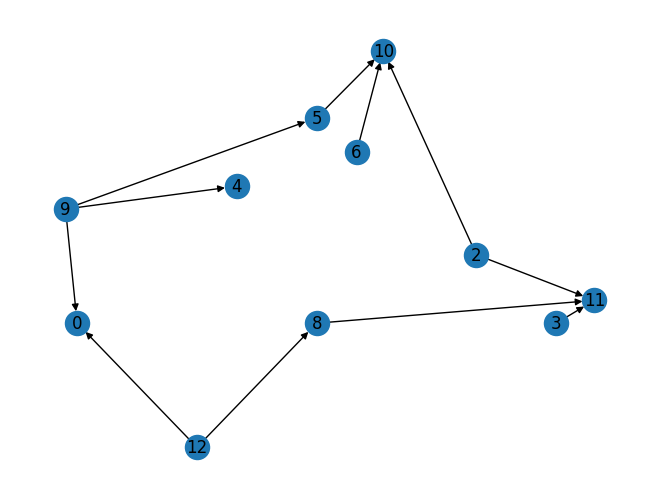

In [13]:
embed = p.GraphData.embed
nx.draw(DG, pos=embed, with_labels=True, arrows=True)